In [1]:
# Import all the necessary packages:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Import data
data = pd.read_excel('European_cities_data.xlsx')
data.dtypes

EU Capitals               object
Cycling modal share       object
Year                       int64
dtype: object

In [3]:
# Update column name
data_2 = data.rename(columns={"Cycling modal share":"modal_share",
                             "EU Capitals":"capitals"})
data_2

capitals modal_share  Year                  
0   Copenhagen        0.49                    2018
1    Amsterdam        0.35                    2017
2       Berlin        0.13                    2013
3     Ljubjana        0.13                    2018
4     Helsinki        0.14                    2019
5       Zagreb       0.101                    2012
6      Dublin          0.1                    2017
7    Stockholm        0.09                    2013
8       Vienna        0.07                    2017
9        Paris        0.05                    2019
10       Riga         0.04                    2014
11   Brussels         0.04                    2014
12  Luxembourg        3,5%                    2011
13      Sofia         0.03                    2010
14     Nicosia        0.02                    2010
15      Athens        0.02                    2005
16    Budapest        0.02                    2014
17  Bratislava        0.02                    2012
18      London        0.02                    2009
19      Prague        0.01                    2013
20     Tallinn        0.01                    2012
21     Vilnius        0.01                    2010
22      Warsaw        0.01                    2009
23      Lisbon        0.01                    2013
24   Bucharest        0.01                    2007
25        Rome       0.006                    2012
26      Madrid           0                    2011

In [4]:
# Clean data - correct data for Luxembourg.
data_2.at[12,'modal_share'] = 0.035
data_2['modal_share'] = data_2['modal_share']*100
data_2

capitals modal_share  Year                  
0   Copenhagen        49.0                    2018
1    Amsterdam        35.0                    2017
2       Berlin        13.0                    2013
3     Ljubjana        13.0                    2018
4     Helsinki        14.0                    2019
5       Zagreb        10.1                    2012
6      Dublin         10.0                    2017
7    Stockholm         9.0                    2013
8       Vienna         7.0                    2017
9        Paris         5.0                    2019
10       Riga          4.0                    2014
11   Brussels          4.0                    2014
12  Luxembourg         3.5                    2011
13      Sofia          3.0                    2010
14     Nicosia         2.0                    2010
15      Athens         2.0                    2005
16    Budapest         2.0                    2014
17  Bratislava         2.0                    2012
18      London         2.0                    2009
19      Prague         1.0                    2013
20     Tallinn         1.0                    2012
21     Vilnius         1.0                    2010
22      Warsaw         1.0                    2009
23      Lisbon         1.0                    2013
24   Bucharest         1.0                    2007
25        Rome         0.6                    2012
26      Madrid           0                    2011

In [5]:
# Ensure data is presented in numeric format
data_2['modal_share'] = pd.to_numeric(data_2['modal_share'])
data_2.head()

capitals  modal_share  Year                  
0  Copenhagen         49.0                    2018
1   Amsterdam         35.0                    2017
2      Berlin         13.0                    2013
3    Ljubjana         13.0                    2018
4    Helsinki         14.0                    2019

In [6]:
# View on barplot for initial analysis
sns.barplot(x='capitals', y='modal_share', data=data_2)

<AxesSubplot:xlabel='capitals', ylabel='modal_share'>

In [7]:
# Create table for top 5 cities plus London only
top_5 = data_2.drop([5,6,7,8,9,10,11,12,
                    13,14,15,16,17,19,
                    20,21,22,23,24,25,26])
top_5

capitals  modal_share  Year                  
0   Copenhagen         49.0                    2018
1    Amsterdam         35.0                    2017
2       Berlin         13.0                    2013
3     Ljubjana         13.0                    2018
4     Helsinki         14.0                    2019
18      London          2.0                    2009

[Text(0, 0, '49'),
 Text(0, 0, '35'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '2')]

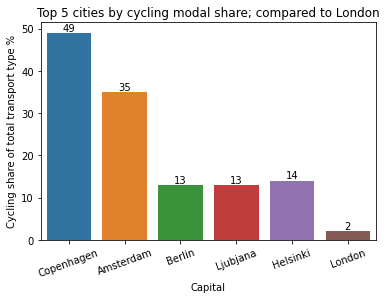

In [15]:
# Bar plot for top 5
ax = sns.barplot(x='capitals', y='modal_share', data=top_5)
ax.set(xlabel='Capital', ylabel='Cycling share of total transport type %', 
       title = 'Top 5 cities by cycling modal share; compared to London')
plt.xticks(rotation=20)
ax.bar_label(ax.containers[0])

In [9]:
# Top 10
top_10 = data_2.drop([10,11,12,
                    13,14,15,16,17,19,
                    20,21,22,23,24,25,26])

top_10

capitals  modal_share  Year                  
0   Copenhagen         49.0                    2018
1    Amsterdam         35.0                    2017
2       Berlin         13.0                    2013
3     Ljubjana         13.0                    2018
4     Helsinki         14.0                    2019
5       Zagreb         10.1                    2012
6      Dublin          10.0                    2017
7    Stockholm          9.0                    2013
8       Vienna          7.0                    2017
9        Paris          5.0                    2019
18      London          2.0                    2009

In [16]:
# Bar plot for top 10
ax_2 = sns.barplot(x='capitals', y='modal_share', data=top_10)
ax_2.set(xlabel='Capital', ylabel='Cycling share of total transport type %', 
       title = 'Top 10 cities by cycling modal share; compared to London')
plt.xticks(rotation=30)
ax_2.bar_label(ax_2.containers[0])

[Text(0, 0, '49'),
 Text(0, 0, '35'),
 Text(0, 0, '13'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '10.1'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '5'),
 Text(0, 0, '2')]

In [11]:
# Import population data
data_pop = pd.read_excel("European_pop_data.xlsx")
data_pop = data_pop.rename(columns={"EU Capitals":"capitals"})
data_pop

capitals  Population
0   Copenhagen      616098
1    Amsterdam      872680
2       Berlin     3664088
3     Ljubjana      279650
4     Helsinki      645657
5       Zagreb      792875
6      Dublin       553165
7    Stockholm      935619
8       Vienna     1911191
9        Paris     2206488
10       Riga       632614
11   Brussels      1175173
12  Luxembourg      119215
13      Sofia      1241675
14     Nicosia     1251488
15      Athens      664046
16    Budapest     1752286
17  Bratislava      427744
18      London     8961989
19      Prague     1301132
20     Tallinn      430805
21     Vilnius      546382
22      Warsaw     1793579
23      Lisbon      505526
24   Bucharest     1829897
25        Rome     2873147
26      Madrid     3223334

In [12]:
# Merge data frames
data_all = data_2.merge(data_pop, on='capitals', how='left')
data_all.head()


capitals  modal_share  Year                    Population
0  Copenhagen         49.0                    2018      616098
1   Amsterdam         35.0                    2017      872680
2      Berlin         13.0                    2013     3664088
3    Ljubjana         13.0                    2018      279650
4    Helsinki         14.0                    2019      645657

In [13]:
# Look for correlation between modal_share and population using linear regression model

# Independent variable
x_pop = data_all['Population']

# Dependent variable
y = data_all['modal_share']

# OLS model and summary.
f = 'y ~ x_pop'
capitals_modal = ols(f, data=data_all).fit()

# Print the regression table.
capitals_modal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7675
Date:                Mon, 24 Oct 2022   Prob (F-statistic):              0.389
Time:                        21:06:24   Log-Likelihood:                -102.24
No. Observations:                  27   AIC:                             208.5
Df Residuals:                      25   BIC:                             211.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9348      2.861      3.123      0.004       3.043      14.826
x_pop      -1.093e-06   1.25e-06     -0.876      0.389   -3.66e-06    1.48e-06
==============================================================================
Omnibus:                       33.510   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.878
Skew:                           2.582   Prob(JB):                     2.02e-17
Kurtosis:                       9.456   Cond. No.                     3.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", capitals_modal.params)

# Extract the standard errors.
print("Standard errors: ", capitals_modal.bse)

# Extract the predicted values.
print("Predicted values: ", capitals_modal.predict())

Parameters:  Intercept    8.934768
x_pop       -0.000001
dtype: float64
Standard errors:  Intercept    2.860650
x_pop        0.000001
dtype: float64
Predicted values:  [ 8.26138918  7.98095203  4.93001904  8.62911769  8.229082    8.06817673
  8.33017323  7.91216142  6.84588777  6.52313618  8.24333764  7.65033542
  8.80446878  7.57765054  7.5669252   8.20898332  7.01956661  8.46725498
 -0.8604426   7.51266566  8.46390939  8.33758687  6.97443448  8.38224137
  6.9347399   5.79449603  5.41175117]


In [18]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -0.000001 * x_pop + 8.934768

# View the output.
y_pred

0     8.318670
1     8.062088
2     5.270680
3     8.655118
4     8.289111
5     8.141893
6     8.381603
7     7.999149
8     7.023577
9     6.728280
10    8.302154
11    7.759595
12    8.815553
13    7.693093
14    7.683280
15    8.270722
16    7.182482
17    8.507024
18   -0.027221
19    7.633636
20    8.503963
21    8.388386
22    7.141189
23    8.429242
24    7.104871
25    6.061621
26    5.711434
Name: Population, dtype: float64

In [22]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x_pop,y)

# Plot the regression line (in black).
plt.plot(x_pop, y_pred, color='red')

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)
plt.title('Modal share vs Population')
plt.xlabel('Population (£m)')
plt.ylabel('Modal share %')
plt.show()

In [21]:
sns.scatterplot(x='Population', y='modal_share', data=data_all)

<AxesSubplot:xlabel='Population', ylabel='modal_share'>